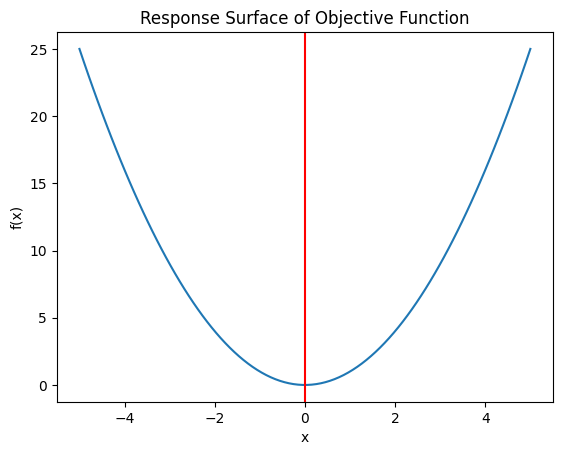

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return x**2

x_values = np.linspace(-5, 5, 100)

y_values = objective_function(x_values)

plt.plot(x_values, y_values)

plt.axvline(x=0, color='red')

plt.title('Response Surface of Objective Function')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()


In [6]:
import random

def tabu_search(initial_solution, neighbor_generator, objective_function, tabu_list_size, max_iterations):
    current_solution = initial_solution
    best_solution = current_solution
    tabu_list = []

    for _ in range(max_iterations):
        neighbors = neighbor_generator(current_solution)

        neighbor_values = [objective_function(neighbor) for neighbor in neighbors]

        best_neighbor_index = min(
            (index for index, value in enumerate(neighbor_values) if neighbors[index] not in tabu_list),
            default=None
        )

        if best_neighbor_index is not None:
            current_solution = neighbors[best_neighbor_index]
            tabu_list.append(current_solution)
            if len(tabu_list) > tabu_list_size:
                tabu_list.pop(0)

            if objective_function(current_solution) < objective_function(best_solution):
                best_solution = current_solution

    return best_solution

def objective_function(x):
    return x**2

def neighbor_generator(solution):
    return [solution + random.uniform(-1, 1) for _ in range(5)]

initial_solution = 0.0
tabu_list_size = 5
max_iterations = 100

best_solution = tabu_search(initial_solution, neighbor_generator, objective_function, tabu_list_size, max_iterations)

print("Best solution found:", best_solution)
print("Objective function value:", objective_function(best_solution))



Best solution found: 0.0
Objective function value: 0.0
